## Gene Set Enrichment Analysis
We use this notebook to show that the small sample lymphocyte proteomics data is in fact representative of lymphocytes specifically.

In [1]:
import load_data
#data = load_data.load_FragPipe()
#Note that here, data does not need to
#    be normalized or subsectioned
data=load_data.load_max_quant()

Here we use a function from load_data to get the names, both the gene name code and verbose headers. We then add these to the quantification data.

In [2]:
names = load_data.names_FragPipe()
data['Names'] = names['Gene Names']
data['Header'] = names['Description']

Now we can run Gene Set Enrichment Analysis (GSEA) on the proteins identified.

In [3]:
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt

In [4]:
genesets = [
    'WikiPathways_2019_Human', 
    'ProteomicsDB_2020',
    'GO_Molecular_Function_2018',
]

We use the ProteomicsDB_2020 genesets, which compare our samples to documented lineages. The following plots show that the lymphocytes we measured are highly similar to several lymphoblastoid cell lines. Bones share a similarity as well, due to their role in producing blood cells.

WikiPathways_2019_Human


,Term,Adjusted P-value
0,Cytoplasmic Ribosomal Proteins WP477,1.452962e-61
1,Proteasome Degradation WP183,4.110797e-29
2,mRNA Processing WP411,4.113140e-24
3,Electron Transport Chain (OXPHOS system in mit...,1.152301e-16
4,TCA Cycle (aka Krebs or citric acid cycle) WP78,9.015504e-14
5,Metabolic reprogramming in colon cancer WP4290,1.137097e-12
6,Parkin-Ubiquitin Proteasomal System pathway WP...,6.545224e-12
7,Translation Factors WP107,7.545112e-12
8,Nonalcoholic fatty liver disease WP4396,3.788318e-09
9,Amino Acid metabolism WP3925,1.365407e-08


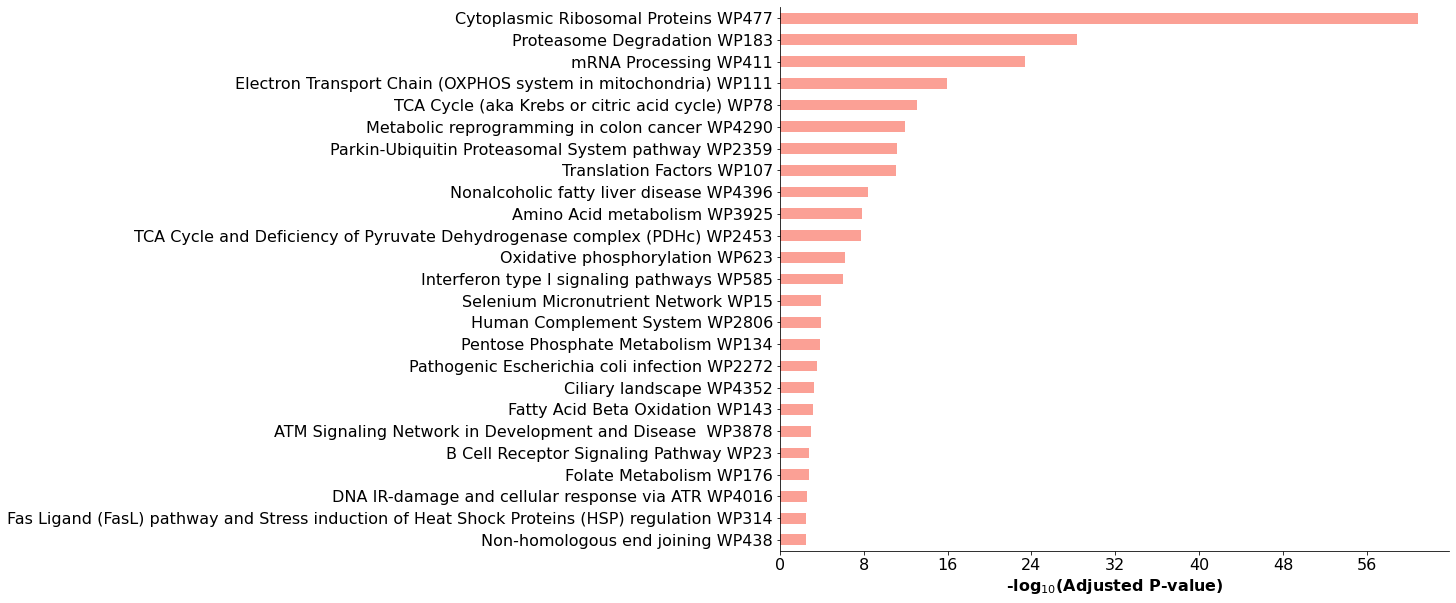

ProteomicsDB_2020


,Term,Adjusted P-value
0,Lymphoblastoid BTO:0000773 X129.126 HM11.GM18552,5.961244e-57
1,Breast HCC-202 PDB:200003 HCC202 R2-1,1.175936e-54
2,Breast MCF-7 BTO:0000093 HCC202 R2-2,7.839576e-55
3,Lymphoblastoid BTO:0000773 X126.126 HM11.GM12878,1.329181e-54
4,Lymphoblastoid BTO:0000773 X127.126 HM11.GM12878,3.133304e-53
5,Lymphoblastoid BTO:0000773 X128.126 HM11.GM12878,2.611087e-53
6,Lymphoblastoid BTO:0000773 X130.126 HM11.GM18522,2.238075e-53
7,Lymphoblastoid BTO:0000773 X131.126 HM11.GM10847,2.902489e-53
8,Hematopoietic JURKAT BTO:0000661 Jurkat R2,3.041936e-50
9,Hematopoietic K-562 BTO:0000664 K562 R2,3.685639e-46


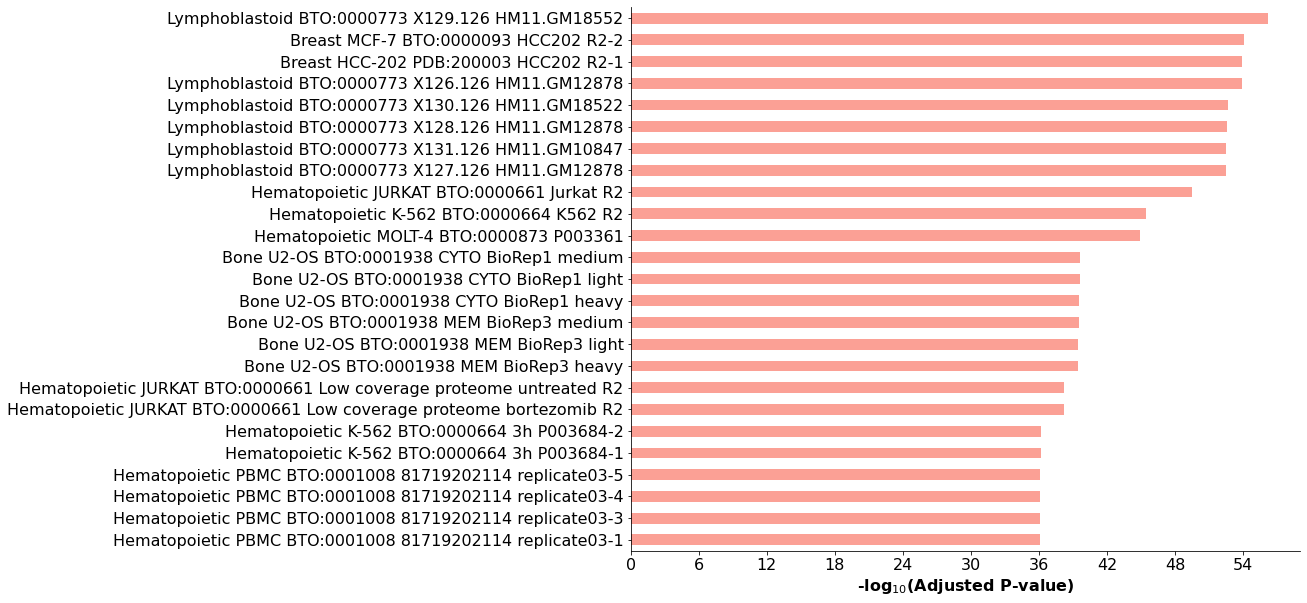

GO_Molecular_Function_2018


,Term,Adjusted P-value
0,RNA binding (GO:0003723),8.778590e-119
1,cadherin binding (GO:0045296),6.565311e-34
2,mRNA binding (GO:0003729),2.986790e-15
3,"translation factor activity, RNA binding (GO:0...",8.452827e-09
4,helicase activity (GO:0004386),6.422634e-07
5,translation initiation factor activity (GO:000...,1.217169e-06
6,actin filament binding (GO:0051015),1.533722e-06
7,protein homodimerization activity (GO:0042803),1.703106e-06
8,proteasome-activating ATPase activity (GO:0036...,1.660325e-06
9,actin binding (GO:0003779),3.033308e-06


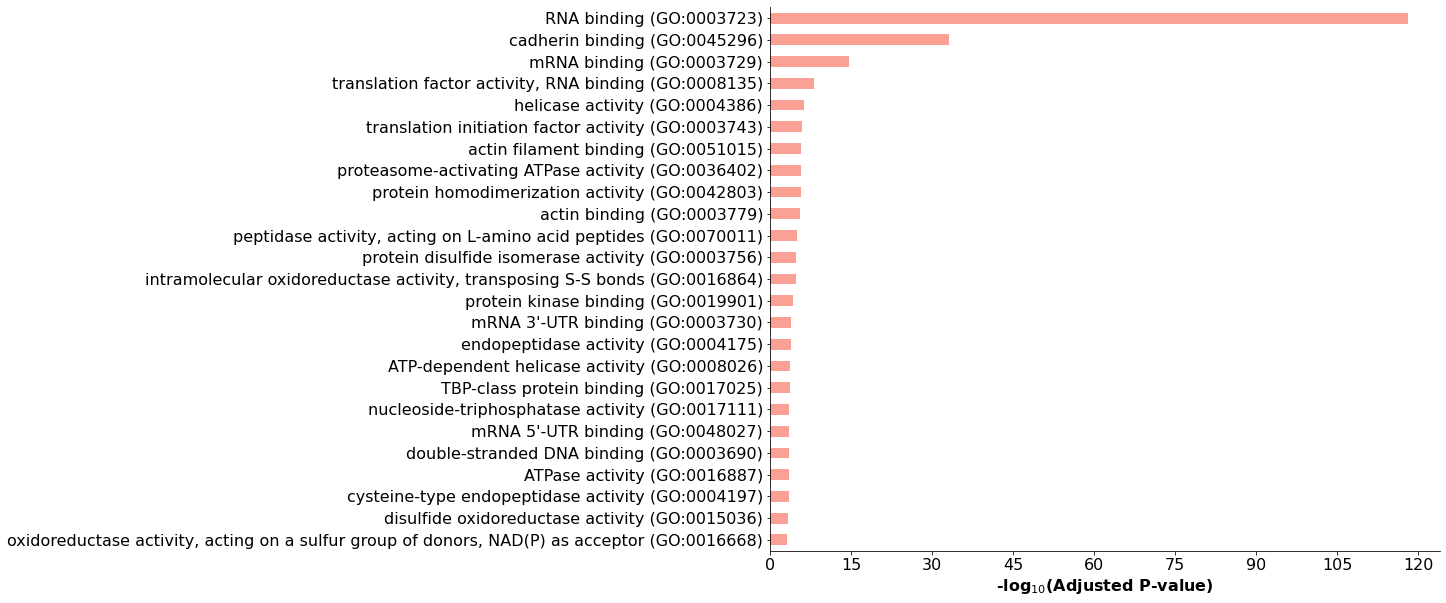

In [5]:
for gset in genesets:
    enr = gp.enrichr(gene_list=list(data.Names.dropna()), 
                   description="Lymphocytes",
                   gene_sets=gset,
                   outdir='/data/test/enrichr'
                )
    
    #as table:
    print(gset)
    display(enr.res2d[['Term','Adjusted P-value']][0:20])
    enr.res2d[['Term','Adjusted P-value']][0:20].to_csv( 'data/figures/{0}.tsv'.format(gset), sep='\t')
    
    #as barplot
    plt.rcParams['font.size'] = 25

    barplot(enr.res2d, top_term=25, figsize=(12, 10)) #title=gset,
    #fig.figsize(16,12)
    plt.savefig('data/figures/{0}_5_FP.png'.format(gset), bbox_inches='tight', dpi=300)
    plt.show()